In [801]:
import pandas as pd
import numpy as np

In [802]:
## custom library

import eda_util as eutil
import submission_config as subconfig
import submission_util as subutil

In [803]:
pd.set_option('display.float_format', lambda x: f'{x:,g}')

In [804]:
BASE_PATH = subconfig.BASE_PATH
DATA_PATH = subconfig.DATA_PATH

OUTPUT_PATH = subconfig.OUTPUT_PATH

In [805]:
import pandas as pd
import numpy as np

df1 = pd.read_csv(subconfig.OUTPUT_PATH / 'Final_JP.csv', index_col = 0)
df2 = pd.read_csv(subconfig.OUTPUT_PATH / 'Final_WH2.csv', index_col = 0)
df3 = pd.read_csv(subconfig.OUTPUT_PATH / 'final_rank_isc.csv', index_col = 0)

In [806]:
df1.sort_index(inplace = True)
df2.sort_index(inplace = True)
df3.sort_index(inplace = True)

In [807]:
def rank_to_vote(rank):
    if rank <= 200:
        return 1
    elif rank >= 1801:
        return -1
    else:
        return 0

In [808]:
df1['vote'] = df1['순위'].apply(lambda x: rank_to_vote(x))
df2['vote'] = df2['순위'].apply(lambda x: rank_to_vote(x))
df3['vote'] = df3['순위'].apply(lambda x: rank_to_vote(x))

In [809]:
final = df1['vote'] + df2['vote']  # + df3['vote']
final.index = [code[1:] for code in final.index]
final

000020    0
000040    0
000050    0
000070    0
000080    0
         ..
375500    0
378850    0
383220    0
383310    1
383800    0
Name: vote, Length: 2000, dtype: int64

In [810]:
final_submission = subutil.Submission(final, 'final')
final_submission

In [811]:
final_submission.get_rank(export_path=subconfig.OUTPUT_PATH)

Saved to C:\Users\asaf0\Desktop\Work\KRX\output\final.csv


,순위
종목코드,
A060310,1836
A095570,201
A006840,202
A054620,203
A265520,204
...,...
A189980,1797
A000540,1798
A003280,1959


In [812]:
krx_df = pd.read_csv(subconfig.krx_df_PATH)

In [813]:
krx_df.columns = ['date', 'code', 'name', 'volume', 'open', 'high', 'low', 'close']

In [814]:
krx_df['date'] = pd.to_datetime(krx_df['date'], format='%Y%m%d')

In [815]:
krx_df

,date,code,name,volume,open,high,low,close
0,2021-06-01,A060310,3S,166690,2890,2970,2885,2920
1,2021-06-01,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,2021-06-01,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,2021-06-01,A054620,APS,462544,14600,14950,13800,14950
4,2021-06-01,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,2023-05-30,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,2023-05-30,A000540,흥국화재,50218,3250,3255,3195,3215
987997,2023-05-30,A003280,흥아해운,130664,1344,1395,1340,1370
987998,2023-05-30,A037440,희림,141932,9170,9260,9170,9200


In [816]:
return_df = pd.read_pickle(subconfig.return_df_PATH)
close_df = pd.read_pickle(subconfig.adjclose_df_PATH)
open_df = pd.read_pickle(subconfig.adjopen_df_PATH)
high_df = pd.read_pickle(subconfig.adjhigh_df_PATH)
low_df = pd.read_pickle(subconfig.adjlow_df_PATH)

In [817]:
## date list

holidays = return_df.isnull().all(axis=1)
tradingdays = ~holidays

holidays = holidays.index[holidays]
tradingdays = tradingdays.index[tradingdays]

In [818]:
TRAIN_START = pd.to_datetime(subconfig.TRAIN_START, format='%Y-%m-%d')
SIMOS_END = pd.to_datetime(subconfig.SIMOS_END, format='%Y-%m-%d')

In [819]:
tradingdays = tradingdays[(tradingdays >= TRAIN_START) & (tradingdays <= SIMOS_END)]

In [820]:
dacon_sid_list = [ii[1:] for ii in krx_df['code'].unique()]

In [821]:
return_df = return_df.loc[tradingdays, :].dropna(axis='columns', how='all')
return_df = return_df.loc[:, dacon_sid_list]

close_df = close_df.loc[tradingdays, :].dropna(axis='columns', how='all')
close_df = close_df.loc[:, dacon_sid_list]

open_df = open_df.loc[tradingdays, :].dropna(axis='columns', how='all')
open_df = open_df.loc[:, dacon_sid_list]

high_df = high_df.loc[tradingdays, :].dropna(axis='columns', how='all')
high_df = high_df.loc[:, dacon_sid_list]

low_df = low_df.loc[tradingdays, :].dropna(axis='columns', how='all')
low_df = low_df.loc[:, dacon_sid_list]

In [822]:
return_df

ISU_SRT_CD,060310,095570,006840,054620,265520,211270,027410,282330,126600,138930,...,243070,084110,145020,024060,010240,189980,000540,003280,037440,238490
trdDd,,,,,,,,,,,,,,,,,,,,,
2021-06-01,0.0103806,-0.0236486,-0.0282486,0.0239726,-0.00171821,0.0522876,0.0042735,0.0137741,0.0142631,0.00503145,...,-0.00158165,-0.0185704,0.00348432,0.0154394,0.0258065,0.0231959,0.0232044,0,0.107948,-0.004329
2021-06-02,-0.00684932,0.00346021,0.059593,-0.0301003,0.00344234,-0.015528,0.00425532,0.00815217,-0.0046875,-0.00125156,...,-0.0237623,-0.0465872,-0.00297619,0.00584795,0,0.0214106,0.0183585,0,0.134904,-0.00869565
2021-06-03,0,-0.0137931,-0.00411523,0.00344828,0.00686106,-0.022082,0.00141243,0.0161725,-0.00941915,-0.00626566,...,0,0.00917093,0.0248756,0.0325581,0.00628931,-0.0160296,-0.00636267,0,0.0235849,0.0131579
2021-06-04,0.0172414,-0.0262238,-0.0110193,-0.0206186,-0.00851789,-0.00967742,-0.00282087,-0.0291777,0.0206022,0.0075662,...,0.00973626,0.0302603,0.0626214,-0.0236486,0.0145833,-0.0150376,0.00640342,0,-0.0276498,0.017316
2021-06-07,0.0677966,-0.02693,-0.0306407,0.045614,-0.00171821,0.0325733,0.00424328,0.0491803,-0.0217391,0.00125156,...,0.00964238,-0.00588045,0.0045683,-0.0149942,-0.026694,-0.0216285,-0.0116649,0,-0.0521327,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.00833333,0.00227015,-0.0156495,0.00280636,0.0139535,0.0218978,-0.00244499,0.00847458,0.00648298,0.00146199,...,-0.0221519,0.01,-0.00878906,-0.00707965,-0.0124224,0.0168067,-0.00778816,-0.0186593,-0.00786517,-0.00509554
2023-06-16,-0.0214876,0.0600227,0.0381558,-0.0186567,-0.00229358,0.00785714,-0.0122549,0.0183824,0,0.00875912,...,0.00809061,0.00990099,0.00985222,0.00356506,0.0550314,0.0165289,0,-0.00633803,0.00906002,0.0435339
2023-06-19,0.0371622,-0.0106838,0.0107198,-0.0123574,-0.0114943,0.0134656,-0.0136476,-0.0422898,0.0161031,0,...,0.00160514,0.0147059,-0.00878049,-0.0035524,0.00447094,-0.00487805,-0.00470958,0.0283487,0.0280584,-0.0208589


In [823]:
df = pd.read_csv("./output/final.csv")
df

,종목코드,순위
0,A060310,1836
1,A095570,201
2,A006840,202
3,A054620,203
4,A265520,204
...,...,...
1995,A189980,1797
1996,A000540,1798
1997,A003280,1959
1998,A037440,1799


In [824]:
# '순위' column을 기준으로 오름차순 정렬
df_sorted = df.sort_values(by="순위")

# '순위1' column 생성 후 1부터 2000까지의 값을 부여
df_sorted['순위1'] = range(1, 2001)

df_sorted


,종목코드,순위,순위1
785,A011230,1,1
1650,A015890,2,2
1405,A023810,3,3
266,A037710,4,4
150,A053290,5,5
...,...,...,...
733,A018310,1996,1996
1876,A011700,1997,1997
1900,A002680,1998,1998
677,A002410,1999,1999


In [825]:
# '순위' column 삭제
df_sorted = df_sorted.drop(columns=['순위'])

# '순위1' column의 이름을 '순위'로 변경
df_sorted = df_sorted.rename(columns={'순위1': '순위'})



In [826]:
df_sorted

,종목코드,순위
785,A011230,1
1650,A015890,2
1405,A023810,3
266,A037710,4
150,A053290,5
...,...,...
733,A018310,1996
1876,A011700,1997
1900,A002680,1998
677,A002410,1999


In [827]:
df_sorted['종목코드'] = df_sorted['종목코드'].str.replace('A', '', 1)


In [828]:
df_sorted

,종목코드,순위
785,011230,1
1650,015890,2
1405,023810,3
266,037710,4
150,053290,5
...,...,...
733,018310,1996
1876,011700,1997
1900,002680,1998
677,002410,1999


In [829]:
# 상위 200개 주식 선택
long_stocks = df_sorted.sort_values(by="순위").head(200)

# 하위 200개 주식 선택
short_stocks = df_sorted.sort_values(by="순위", ascending=False).head(200)

# 결과 출력
print("Long Stocks:")
print(long_stocks)

print("\nShort Stocks:")
print(short_stocks)


Long Stocks:
        종목코드   순위
785   011230    1
1650  015890    2
1405  023810    3
266   037710    4
150   053290    5
...      ...  ...
529   092070  196
1946  092300  197
1855  092460  198
331   092730  199
1137  092870  200

[200 rows x 2 columns]

Short Stocks:
        종목코드    순위
1729  001020  2000
677   002410  1999
1900  002680  1998
1876  011700  1997
733   018310  1996
...      ...   ...
555   084650  1805
388   084690  1804
1042  085810  1803
666   086040  1802
1668  089030  1801

[200 rows x 2 columns]


In [830]:
long_stocks_list = long_stocks["종목코드"].tolist()
short_stocks_list = short_stocks["종목코드"].tolist()


In [831]:
long_stocks_list

['011230',
 '015890',
 '023810',
 '037710',
 '053290',
 '064350',
 '065510',
 '078940',
 '094170',
 '095270',
 '096610',
 '103590',
 '105330',
 '140410',
 '164060',
 '217620',
 '222810',
 '000250',
 '000480',
 '000850',
 '001060',
 '001230',
 '001390',
 '001430',
 '001570',
 '001780',
 '002200',
 '002630',
 '002710',
 '003010',
 '003080',
 '003120',
 '003200',
 '003670',
 '004360',
 '004370',
 '004830',
 '004910',
 '004920',
 '005070',
 '005110',
 '005290',
 '005800',
 '005860',
 '006200',
 '006370',
 '006730',
 '006800',
 '006880',
 '006980',
 '007340',
 '007540',
 '007590',
 '007660',
 '007770',
 '007860',
 '007980',
 '008870',
 '009200',
 '009470',
 '009540',
 '009730',
 '010060',
 '010100',
 '010120',
 '010140',
 '010280',
 '010640',
 '010690',
 '010770',
 '011560',
 '011760',
 '012330',
 '012610',
 '012700',
 '012860',
 '013520',
 '013870',
 '014990',
 '015760',
 '015860',
 '016590',
 '016710',
 '017390',
 '017510',
 '017670',
 '018250',
 '018290',
 '018680',
 '019660',
 '019770',

In [832]:
short_stocks_list

['001020',
 '002410',
 '002680',
 '011700',
 '018310',
 '030960',
 '031860',
 '032800',
 '038530',
 '046390',
 '168330',
 '205470',
 '214870',
 '222980',
 '230240',
 '249420',
 '252500',
 '268600',
 '300080',
 '301300',
 '332290',
 '347740',
 '000230',
 '000440',
 '000490',
 '000680',
 '001040',
 '001140',
 '001360',
 '001440',
 '001470',
 '001790',
 '002290',
 '002320',
 '002380',
 '002390',
 '002460',
 '002600',
 '002790',
 '002900',
 '002960',
 '003280',
 '003300',
 '003560',
 '003610',
 '003620',
 '003850',
 '003960',
 '004440',
 '004890',
 '004960',
 '004990',
 '005010',
 '005250',
 '005750',
 '005950',
 '006040',
 '006220',
 '006910',
 '007210',
 '007310',
 '007530',
 '007810',
 '008040',
 '008370',
 '008420',
 '008730',
 '008830',
 '009410',
 '009620',
 '009810',
 '010170',
 '010580',
 '011000',
 '011150',
 '011170',
 '012340',
 '013580',
 '013720',
 '013810',
 '013890',
 '014160',
 '014200',
 '014280',
 '014790',
 '014910',
 '016100',
 '016250',
 '016580',
 '016790',
 '017900',

In [833]:
# 2023-05-31부터 2023-06-21까지의 리턴 데이터
selected_return_df = return_df.loc['2023-05-31':'2023-06-21']

In [834]:
selected_return_df

ISU_SRT_CD,060310,095570,006840,054620,265520,211270,027410,282330,126600,138930,...,243070,084110,145020,024060,010240,189980,000540,003280,037440,238490
trdDd,,,,,,,,,,,,,,,,,,,,,
2023-05-31,0.00165837,-0.017321,-0.00998948,-0.0123894,0,-0.00343643,-0.00605327,0.0381679,0.00408719,-0.00445104,...,-0.0184615,-0.00731707,-0.0135993,0,0.00955414,0,0,-0.0131387,-0.00108696,0.0145985
2023-06-01,-0.0397351,0.0105758,-0.00849708,-0.00537634,0.00936768,-0.0144828,-0.00609013,-0.0315126,-0.00814111,0.00149031,...,0.00940439,0.022113,0.0266544,0.00176991,0.00157729,0.00838926,-0.00777605,-0.00739645,-0.00217628,-0.0167866
2023-06-02,-0.00862069,0.0290698,0.0133905,-0.0108108,0.00232019,0.0125962,0.00490196,0.0016269,-0.00136799,0.00892857,...,-0.0295031,-0.0144231,-0.0402865,0.00353357,0.0188976,-0.00665557,0.00783699,0.0149031,0.00545256,0.0097561
2023-06-05,0.0208696,0.00338983,0.00845666,-0.0200364,-0.0162037,0.015895,0.00243902,0.00108284,0.00410959,0.00884956,...,-0.008,-0.0097561,0.0139925,0.0123239,0.0200927,-0.00167504,-0.00311042,0.0132159,0.0010846,0.0289855
2023-06-07,-0.0153322,-0.0112613,-0.00419287,0.0315985,0.00470588,-0.0129252,-0.00364964,0.00919416,-0.0368349,0.00146199,...,0,0,-0.0156394,-0.00173913,-0.0136364,0.0033557,-0.00468019,0.00362319,-0.00108342,-0.00704225
2023-06-08,0.0242215,-0.0022779,-0.01,-0.0324324,0.00234192,-0.0289456,0.00732601,-0.0166131,-0.0212465,0.0131387,...,0.0209677,-0.0123153,-0.0205607,0.00348432,0,-0.00334448,0.0219436,0.00433213,-0.016269,-0.0189125
2023-06-09,0.00168919,0.00799087,-0.00372142,0.0288641,0.00700935,0.0120653,0.00363636,0.0141689,-0.00289436,0.0100865,...,0.0236967,0.0174564,0.0200382,-0.0104167,0.00921659,0,0.00460123,0.0416966,0.00330761,-0.0228916
2023-06-12,0.0370995,-0.00792752,-0.0272145,-0.00633484,-0.00928074,0.0056101,-0.00603865,0.00376142,-0.0566038,-0.0114123,...,-0.0154321,-0.0147059,-0.0168382,-0.00701754,0,0.00167785,0.0137405,0.0559006,0.0010989,0.0234279
2023-06-13,-0.0113821,0.00228311,0.00329128,-0.0100182,0.0187354,-0.00627615,-0.00607533,-0.00588865,-0.0230769,-0.001443,...,-0.0031348,0.00497512,-0.00475737,-0.00176678,-0.00913242,0.00670017,-0.0165663,-0.0222222,-0.00439078,-0.0156627


In [835]:
# 일간 Risk Free Rate 계산
daily_risk_free_rate = (1 + 0.035)**(1/252) - 1
daily_risk_free_rate

0.00013652291648980075

In [836]:
# Long, Short 주식들의 평균 리턴 계산
long_returns = return_df[long_stocks_list].mean(axis=1)
short_returns = return_df[short_stocks_list].mean(axis=1)

In [837]:
long_returns

trdDd
2021-06-01      0.0109393
2021-06-02     0.00532544
2021-06-03     0.00538031
2021-06-04     0.00348955
2021-06-07   -0.000298123
                 ...     
2023-06-15     0.00206118
2023-06-16      0.0132397
2023-06-19     0.00893614
2023-06-20    0.000400373
2023-06-21     0.00122352
Length: 485, dtype: float64

In [838]:
short_returns

trdDd
2021-06-01      0.0078925
2021-06-02     0.00565789
2021-06-03     0.00787249
2021-06-04   -8.10323e-06
2021-06-07     0.00111653
                 ...     
2023-06-15    -0.00638453
2023-06-16     0.00777503
2023-06-19     0.00657193
2023-06-20    -0.00424957
2023-06-21     -0.0117137
Length: 485, dtype: float64

In [839]:
# 전략의 전체 리턴 계산
strategy_returns = long_returns - short_returns

In [840]:
rolling_std = strategy_returns.rolling(window=15).std()

In [841]:
daily_sharpe_ratio = (strategy_returns - daily_risk_free_rate) / rolling_std

In [842]:
daily_sharpe_ratio

trdDd
2021-06-01        NaN
2021-06-02        NaN
2021-06-03        NaN
2021-06-04        NaN
2021-06-07        NaN
               ...   
2023-06-15    1.21316
2023-06-16   0.871271
2023-06-19   0.397575
2023-06-20    1.05527
2023-06-21    3.68033
Length: 485, dtype: float64

In [843]:
daily_sharpe_ratio_15 = daily_sharpe_ratio.tail(15)

In [844]:
daily_sharpe_ratio_15

trdDd
2023-05-31    0.733879
2023-06-01    0.416964
2023-06-02     0.94579
2023-06-05     0.12813
2023-06-07   0.0940205
2023-06-08    0.202415
2023-06-09      1.3814
2023-06-12     1.22438
2023-06-13     0.33972
2023-06-14    0.548141
2023-06-15     1.21316
2023-06-16    0.871271
2023-06-19    0.397575
2023-06-20     1.05527
2023-06-21     3.68033
dtype: float64

In [845]:
import matplotlib.pyplot as plt

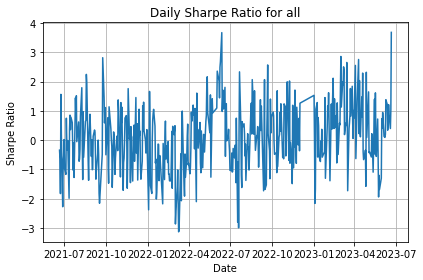

In [846]:
# 결과 시각화
plt.plot(daily_sharpe_ratio)
plt.title('Daily Sharpe Ratio for all')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

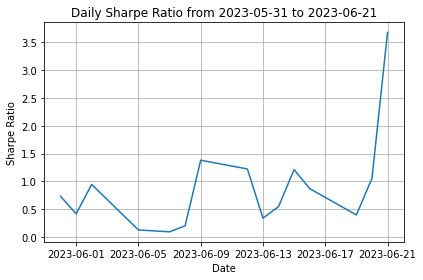

In [847]:
# 결과 시각화
plt.plot(daily_sharpe_ratio_15)
plt.title('Daily Sharpe Ratio from 2023-05-31 to 2023-06-21')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()